<a href="https://colab.research.google.com/github/Jefferson-Luiz/Imersao-Inteligencia-Artificial/blob/main/ProjetoVendasB2B_Grupo03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
Projeto Vendas B2B - O objetivo deste projeto é desenvolver um dashboard simples que permita analisar informações básicas sobre vendas B2B.
    * O projeto deverá contemplar os seguintes pontos de análise:
    * Volume total de vendas por região.
    * Receita total por setor.
    * Quantidade de vendas por categoria de produto.
    * Desempenho individual dos vendedores (valor total vendido).
    * Produtos mais vendidos.

```

A imagem abaixo mostra como diferentes tabelas de um banco de dados se relacionam para registrar vendas.

1.   Clientes: Guarda informações sobre cada cliente (ID, nome, setor, tamanho da empresa, região).
2.   Produtos: Guarda informações sobre cada produto (ID, nome, preço, categoria).
3. Vendedores: Guarda informações sobre cada vendedor (ID, nome, região).
4. Vendas: Guarda informações sobre cada venda, criando um elo entre as outras tabelas. Cada venda se refere a um único cliente, um único vendedor, e um único produto.

Relacionamentos:

* Um cliente pode fazer várias vendas (um para muitos).

* Um produto pode ser vendido em várias vendas (um para muitos).

* Um vendedor pode fazer várias vendas (um para muitos).

Em resumo, a tabela "Vendas" conecta as informações de Clientes, Produtos e Vendedores para rastrear cada venda individualmente. A redundância entre ID_Vendedor/idVendedores (e similares) é problemática; um campo por tipo de dado é suficiente para manter uma boa forma, e é considerado uma boa prática quando criando bancos de dados.

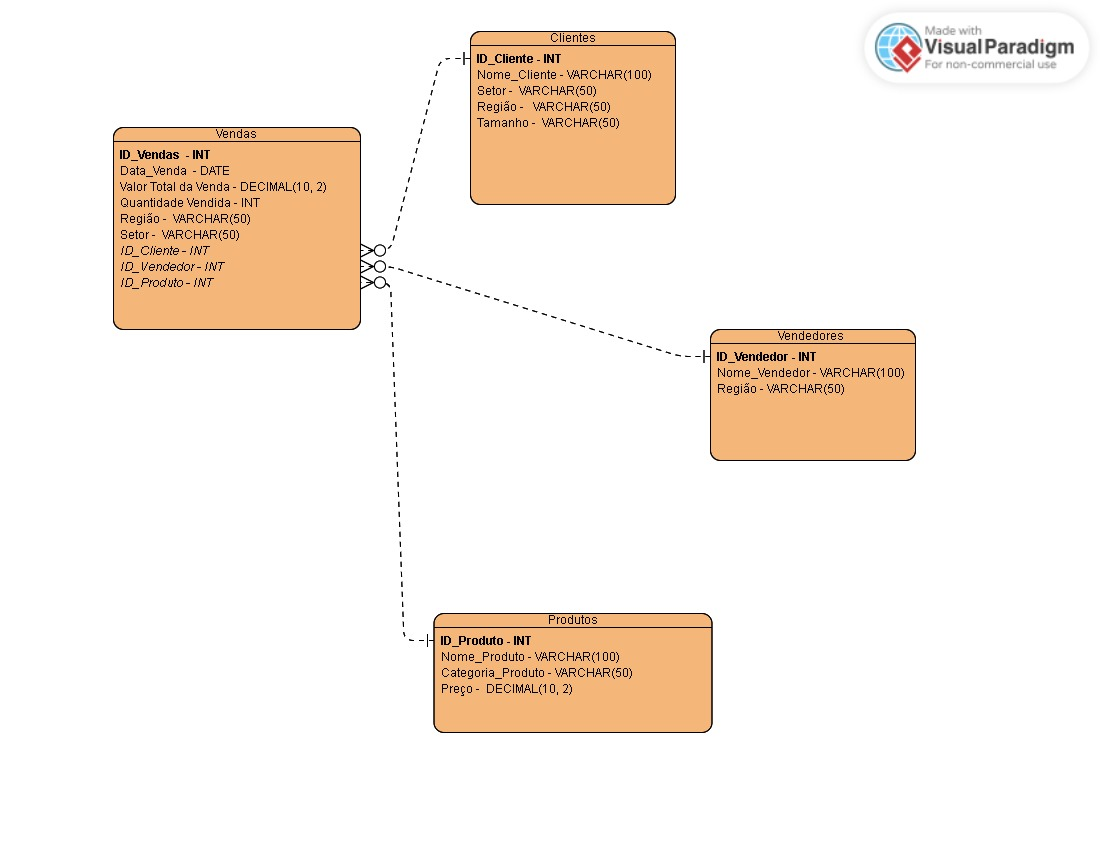

* Este projeto aborda o desafio de processar dados de vendas distribuídos em múltiplos arquivos no Google Cloud Storage. Para superar os problemas de inconsistências nos dados (codificação, tipos, valores ausentes), foi desenvolvido um pipeline ETL completo. O código utiliza o Pandas para manipulação e limpeza, com funções dedicadas ao tratamento de dados, juntando os conjuntos de dados numa unica tabela limpa, eficiente e concisa.

* Este script tem como objetivo realizar o processamento e a transformação de dados a partir de arquivos CSV armazenados no Google Cloud Storage (GCS) e carregá-los no Google BigQuery. O processo inclui as etapas de extração de dados, limpeza, transformação (tratamento de valores nulos e conversão de tipos de dados), e carregamento de dados tanto no GCS quanto no BigQuery

Etapa 1: Foi criado um bucket no Google Cloud Storage e a base de dados B2B foi armazenada em uma pasta chamada "dados brutos".

Transferência de dados da bucket para o mysql.

Instalando as bibliotecas permitidas para acessar o Google Cloud Storage e o MySQL:

In [ ]:
!pip install google-cloud-storage
!pip install mysql-connector-python

In [ ]:
!curl ipecho.net/plain

34.70.165.64

Carregando as credenciais de autenticação do Google Cloud no Colab:

In [ ]:
from google.colab import auth
auth.authenticate_user()

Configurando o cliente do Google Cloud Storage:

In [ ]:
from google.cloud import storage

client = storage.Client()
bucket_name ='embraer_soulcode_projeto'
bucket = client.get_bucket(bucket_name)

Fazendo o download dos arquivos CSV do bucket:

In [ ]:
import os

In [ ]:
blobs = bucket.list_blobs(prefix='grupo3_dados_brutos_embraer_soulcode')
for blob in blobs:
    if blob.name.endswith('/'):
       os.makedirs(blob.name, exist_ok=True)
    else:
        blob.download_to_filename(blob.name)

Configurando a conexão com o banco de dados MySQL:

In [ ]:
import os
import mysql.connector
from mysql.connector import Error
import pandas as pd

def conectar_mysql():
    try:
        connection = mysql.connector.connect(
            host='35.222.8.234',
            user='root',
            password='',
            database='b2bgrupo3'
        )

        if connection.is_connected():
            print("Conexão bem-sucedida ao MySQL")
            return connection

    except Error as e:
        print(f"Erro ao conectar ao MySQL: {e}")
        return None

# Uso da função
conexao = conectar_mysql()
# This line obtains a cursor object from the connection
cursor = conexao.cursor()

Carregando os dados nas tabelas do MySQL, para cada arquivo CSV:

In [ ]:
import pandas as pd

In [ ]:
create_table_query = """
CREATE TABLE IF NOT EXISTS Clientes (
    ID_Cliente INT PRIMARY KEY,
    Nome_Cliente VARCHAR(255),
    Setor VARCHAR(255),
    Região VARCHAR(255),
    Tamanho VARCHAR(255)
) ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci;
"""
cursor.execute(create_table_query)
conexao.commit()

import pandas as pd
# Inserir os dados do CSV

csv_file = 'grupo3_dados_brutos_embraer_soulcode/Cópia de Cópia de Base_Dados_Vendas_B2B(Clientes).csv'

if not os.path.exists(csv_file):
    print(f"Current working directory: {os.getcwd()}")
    print(f"Current working directory: {os.getcwd()}")
    raise FileNotFoundError(f"File not found: {csv_file}. Please ensure the file is in the correct directory or provide the full path.")

df = pd.read_csv(csv_file, encoding='latin1', delimiter=';', header=0, names=['ID_Cliente', 'Nome_Cliente', 'Setor', 'Região', 'Tamanho'])
df = df.where(pd.notna(df), None)

for index, row in df.iterrows():

   row = [None if pd.isnull(x) else x for x in row]
   sql = "INSERT IGNORE INTO Clientes (ID_Cliente, Nome_Cliente, Setor, Região, Tamanho) VALUES (%s, %s, %s, %s, %s)"

   cursor.execute(sql, tuple(row))
conexao.commit()


In [ ]:
cursor.execute("SHOW CREATE TABLE Clientes;")
print(cursor.fetchone())

In [ ]:
print(df.head())

In [ ]:
import pandas as pd

In [ ]:
create_table_query = """
CREATE TABLE IF NOT EXISTS Produtos (
    ID_Produto INT PRIMARY KEY,
    Nome_Produto VARCHAR(255),
    Categoria VARCHAR(255),
    Preço DECIMAL(10,2)
)ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci;
"""
cursor.execute(create_table_query)  # Execute the create table query
conexao.commit() # Commit the changes to the database


csv_file = 'grupo3_dados_brutos_embraer_soulcode/Cópia de Cópia de Base_Dados_Vendas_B2B(Produtos).csv'
if not os.path.exists(csv_file):
    raise FileNotFoundError(f"File not found: {csv_file}. Please ensure the file is in the correct directory or provide the full path.")

df = pd.read_csv(csv_file, encoding='latin1', delimiter=';',header=0, names=['ID_Produto', 'Nome_Produto', 'Categoria', 'Preço'])
df['Preço'] = pd.to_numeric(df['Preço'].str.replace(',', '.'), errors='coerce') # Replace comma with dot for decimal and convert to numeric


#remover linhas com NaN
df.dropna(inplace=True)
# Inserir dados no MySQL
# Iterate through rows, skipping the header row
for index, row in df.iloc[1:].iterrows():

    sql = "INSERT IGNORE INTO Produtos (ID_Produto, Nome_Produto, Categoria, Preço) VALUES (%s, %s, %s, %s)"

    cursor.execute(sql, tuple(row))
conexao.commit()

In [ ]:
cursor.execute("SHOW CREATE TABLE Produtos;")
print(cursor.fetchone())

In [ ]:
print(df.head())

In [ ]:
create_table_query = """
CREATE TABLE IF NOT EXISTS Vendedores (
    ID_vendedor INT PRIMARY KEY,
    Nome_vendedor VARCHAR(255),
    Região VARCHAR(255),
    UNIQUE KEY (ID_vendedor)
)ENGINE=InnoDB DEFAULT CHARSET=utf8mb4 COLLATE=utf8mb4_0900_ai_ci;
"""
cursor.execute(create_table_query)  # Execute the create table query
conexao.commit() # Commit the changes to the database

import pandas as pd

csv_file = 'grupo3_dados_brutos_embraer_soulcode/Cópia de Cópia de Base_Dados_Vendas_B2B(Vendedores).csv'

if not os.path.exists(csv_file):
    raise FileNotFoundError(f"File not found: {csv_file}. Please ensure the file is in the correct directory or provide the full path.")


df = pd.read_csv(csv_file, encoding='latin1', delimiter=';',header=0, names=['ID_Vendedor', 'Nome_Vendedor', 'Região'])


#remover linhas com NaN
df.dropna(inplace=True)
# Inserir dados no MySQL
# Iterate through rows, skipping the header row
for index, row in df.iloc[1:].iterrows():

   # Check if ID_Vendedor already exists
    sql_check = "SELECT 1 FROM Vendedores WHERE ID_Vendedor = %s"
    cursor.execute(sql_check, (row['ID_Vendedor'],))
    if cursor.fetchone() is None:  # If ID_Vendedor doesn't exist

       sql = "INSERT INTO Vendedores (ID_Vendedor, Nome_Vendedor, Região) VALUES (%s, %s, %s)"
    else:
        # If ID_Vendedor already exists, skip this iteration to avoid duplicate key errors
        continue

    cursor.execute(sql, tuple(row))
    conexao.commit()

In [ ]:
cursor.execute("SHOW CREATE TABLE Vendedores;")
print(cursor.fetchone())

In [ ]:
print(df.head())

In [ ]:
create_table_query = """
CREATE TABLE IF NOT EXISTS Vendas (
    ID_Venda INT,
    Data_Venda DATE,
    ID_Cliente INT,
    ID_Produto INT,
    Quantidade INT,
    Valor_Total DECIMAL(10,2),
    Região VARCHAR(255),
    Setor VARCHAR(255),
    ID_Vendedor INT,
    FOREIGN KEY (ID_Cliente) REFERENCES Clientes(ID_Cliente) ON DELETE SET NULL ON UPDATE CASCADE,
    FOREIGN KEY (ID_Produto) REFERENCES Produtos(ID_Produto) ON DELETE SET NULL ON UPDATE CASCADE,
    FOREIGN KEY (ID_Vendedor) REFERENCES Vendedores(ID_Vendedor) ON DELETE SET NULL ON UPDATE CASCADE
)
"""
cursor.execute(create_table_query)
conexao.commit() # Commit the changes to the database

import pandas as pd

csv_file = 'grupo3_dados_brutos_embraer_soulcode/Cópia de Cópia de Base_Dados_Vendas_B2B(Vendas).csv'
df = pd.read_csv(csv_file, encoding='latin1', delimiter=';', names=['ID_Venda', 'Data_Venda', 'ID_Cliente', 'ID_Produto', 'Quantidade','Valor_Total', 'Região', 'Setor', 'ID_Vendedor'])

# Now convert any remaining non-float values to NaN
df['Valor_Total'] = df['Valor_Total'].str.replace('[^0-9,.]', '', regex=True).str.replace(',', '.').astype(float, errors='ignore')

# Now convert any remaining non-float values to NaN
df['Valor_Total'] = pd.to_numeric(df['Valor_Total'], errors='coerce')

# Drop rows with NaN in 'Valor_Total' if desired
df.dropna(subset=['Valor_Total'], inplace=True)

# Inserir dados no MySQL
# Iterate through rows, skipping the header row
for index, row in df.iloc[1:].iterrows():
    # Before inserting, check if foreign keys exist
    cursor.execute("SELECT 1 FROM Clientes WHERE ID_Cliente = %s", (row['ID_Cliente'],))
    cliente_exists = cursor.fetchone() is not None

    cursor.execute("SELECT 1 FROM Produtos WHERE ID_Produto = %s", (row['ID_Produto'],))
    produto_exists = cursor.fetchone() is not None

    cursor.execute("SELECT 1 FROM Vendedores WHERE ID_Vendedor = %s", (row['ID_Vendedor'],))
    vendedor_exists = cursor.fetchone() is not None

    if cliente_exists and produto_exists and vendedor_exists:
        sql = "INSERT INTO Vendas (ID_Venda, Data_Venda, ID_Cliente, ID_Produto, Quantidade, Valor_Total, Região, Setor, ID_Vendedor) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)"
        cursor.execute(sql,tuple(row))
    else:
        print(f"Skipping row {index + 2} due to missing foreign key:Cliente: {cliente_exists}, Produto: {produto_exists}, Vendedor: {vendedor_exists}")
conexao.commit()

In [ ]:
cursor.execute("SHOW CREATE TABLE Vendas;")
print(cursor.fetchone())

In [ ]:
print(df.head())

In [ ]:
fechando a conexão com o banco de dados após transferir todos os dados:

In [ ]:
cursor.close()
conexao.close()

Etapa 2
1. Instalação das Bibliotecas

In [ ]:
import pandas as pd
from google.cloud import storage, bigquery
from google.colab import auth
from google.api_core.exceptions import NotFound

2. O script começa com a autenticação do usuário no Google Cloud utilizando o auth.authenticate_user(), permitindo o acesso aos serviços de Google Cloud Storage (GCS) e BigQuery..


In [ ]:
auth.authenticate_user()

3. Configuração de Parâmetros de Projeto e Armazenamento:

* O ID do projeto (project_id), o nome do bucket no GCS (bucket_name) e o dataset no BigQuery (dataset_bigquery) são configurados. Esses parâmetros são essenciais para localizar e carregar os dados para os respectivos destinos.

In [ ]:
project_id = "embraer-etl-gcp"
bucket_name = "embraer_soulcode_projeto"
dataset_bigquery = "soulcode_dataset"

4. Definição dos Arquivos CSV no GCS
* arquivos_csv: Dicionário que mapeia os nomes das tabelas para os caminhos dos arquivos CSV no Google Cloud Storage.

In [ ]:
arquivos_csv = {
    "clientes": "grupo3_dados_brutos_embraer_soulcode/Cópia de Cópia de Base_Dados_Vendas_B2B(Clientes).csv",
    "produtos": "grupo3_dados_brutos_embraer_soulcode/Cópia de Cópia de Base_Dados_Vendas_B2B(Produtos).csv",
    "vendas": "grupo3_dados_brutos_embraer_soulcode/Cópia de Cópia de Base_Dados_Vendas_B2B(Vendas).csv",
    "vendedores": "grupo3_dados_brutos_embraer_soulcode/Cópia de Cópia de Base_Dados_Vendas_B2B(Vendedores).csv"
}



5. Função extrair_dados_gcs:

* Esta função extrai os dados de arquivos CSV armazenados no GCS. Ela tenta ler os arquivos em diferentes encodings (latin-1 e utf-8) para garantir que os dados sejam carregados corretamente, mesmo em caso de problemas de codificação.
Ela utiliza a biblioteca pandas para carregar os dados em DataFrames, que são então processados para as etapas subsequentes

In [ ]:
def extrair_dados_gcs(bucket_name, blob_name):
    try:
        storage_client = storage.Client(project=project_id)
        bucket = storage_client.bucket(bucket_name)
        blob = bucket.blob(blob_name)
        with blob.open("rb") as f:
            try:
                df = pd.read_csv(f, encoding='latin-1', sep=';', on_bad_lines='skip')
            except UnicodeDecodeError:
                print(f"Erro de codificação em '{blob_name}'. Tentando UTF-8...")
                df = pd.read_csv(f, encoding='utf-8', sep=';', on_bad_lines='skip')
            return df
    except Exception as e:
        print(f"Erro ao acessar ou processar o blob '{blob_name}': {e}")
        return pd.DataFrame()


6. Função limpar_dados:

* A função limpar_dados faz a limpeza dos dados extraídos, preenchendo valores ausentes (nulos):
Para colunas numéricas, os valores ausentes são preenchidos com a média da coluna.
* Para colunas de texto, os valores ausentes são preenchidos com a string 'Desconhecido'.
* Também são removidos os registros duplicados e aplicadas transformações em colunas do tipo texto para garantir que os valores sejam consistentes (remoção de espaços e padronização da capitalização

In [ ]:
def limpar_dados(df):
    df = df.copy()
    for col in df.columns:
        if df[col].isnull().any():
            if pd.api.types.is_numeric_dtype(df[col]):
                df[col] = pd.to_numeric(df[col], errors='coerce').fillna(df[col].mean())
            else:
                df[col] = df[col].fillna('Desconhecido')

    # Remover as linhas onde "Desconhecido" aparece em qualquer coluna
    df = df[~df.isin(['Desconhecido']).any(axis=1)]

    df.drop_duplicates(inplace=True)
    for col in df.select_dtypes(include=['object']):
        df[col] = df[col].str.strip().str.title()
    return df


7. Função corrigir_e_filtrar:

* Esta função aplica correções adicionais para garantir que os dados estejam no formato correto antes do carregamento no BigQuery:
* Conversão de Tipos: Converte valores numéricos armazenados como strings (e.g., ID_Cliente, ID_Produto, ID_Vendedor, etc.) para inteiros, e valores monetários (como Valor_Total) para float.
* Conversão de Data: A coluna Data_Venda é convertida para o tipo datetime, utilizando o formato '%Y-%m-%d', para garantir que os dados sejam tratados corretamente no BigQuery.
* Correção de Colunas Específicas: A função pode ser expandida para incluir mais colunas, conforme necessário, e aplicar correções semelhantes.

In [ ]:
def corrigir_e_filtrar(dfs):
    # Ajuste para colunas float64 como ID_Cliente, ID_Produto
    for nome, df in dfs.items():
        if 'ID_Cliente' in df.columns:
            df['ID_Cliente'] = df['ID_Cliente'].fillna(0).astype('int')
        if 'ID_Produto' in df.columns:
            df['ID_Produto'] = df['ID_Produto'].fillna(0).astype('int')
        if 'ID_Vendedor' in df.columns:
            df['ID_Vendedor'] = df['ID_Vendedor'].fillna(0).astype('int')
        if 'Valor_Total' in df.columns:
            df['Valor_Total'] = df['Valor_Total'].str.replace(',', '.').astype(float)  # Convert to float after replacing comma

        # Convertendo a coluna Data_Venda para datetime
        if 'Data_Venda' in df.columns:
            df['Data_Venda'] = pd.to_datetime(df['Data_Venda'], format='%Y-%m-%d', errors='coerce')

    return dfs

8. Função criar_dataset_bigquery:

* Antes de carregar os dados no BigQuery, o script verifica se o dataset no BigQuery já existe. Se não existir, o script cria o dataset. Isso garante que o BigQuery tenha o local adequado para armazenar as tabelas.

In [ ]:

# Função para criar conjunto de dados no BigQuery
def criar_dataset_bigquery(dataset_id):
    bigquery_client = bigquery.Client(project=project_id)
    try:
        dataset = bigquery_client.get_dataset(dataset_id)
        print(f"Dataset {dataset_id} já existe.")
    except NotFound:
        dataset = bigquery_client.create_dataset(dataset_id)
        print(f"Dataset {dataset_id} criado com sucesso.")

09. Função para Carregar Dados no BigQuery
* Execução ETL:
* Para cada arquivo CSV, os dados são extraídos do GCS, limpos e transformados.
* Os IDs são convertidos para inteiros.
* O dataset no BigQuery é criado (se necessário).
Finalmente, os dados limpos e transformados são carregados nas tabelas do BigQuery.

In [ ]:

def carregar_bigquery(dfs, dataset_id):
    try:
        bigquery_client = bigquery.Client(project=project_id)
        for nome, df in dfs.items():
            if not df.empty:
                tabela_id = f"{dataset_id}.{nome}"
                job_config = bigquery.LoadJobConfig(
                    write_disposition="WRITE_TRUNCATE",
                    source_format=bigquery.SourceFormat.CSV
                )
                job = bigquery_client.load_table_from_dataframe(
                    df, tabela_id, job_config=job_config
                )
                job.result()
                print(f"Dados carregados com sucesso no BigQuery: {tabela_id}")
    except Exception as e:
        print(f"Erro ao carregar dados no BigQuery: {e}")



10. Função carregar_gcs:

* Após o processamento e limpeza dos dados, a função carregar_gcs faz o upload dos DataFrames para o GCS, convertendo-os de volta para o formato CSV. Os arquivos são armazenados em um diretório chamado dados_tratados/ no GCS.

In [ ]:

def carregar_gcs(dfs, bucket_name):
    storage_client = storage.Client(project=project_id)
    for nome, df in dfs.items():
        if not df.empty:
            caminho_gcs = f"dados_tratados/{nome}.csv"
            bucket = storage_client.bucket(bucket_name)
            blob = bucket.blob(caminho_gcs)
            blob.upload_from_string(df.to_csv(index=False), content_type='text/csv')
            print(f"Dados carregados com sucesso no GCS: {caminho_gcs}")



11. Função carregar_bigquery:
* Esta função carrega os dados no BigQuery após a transformação e limpeza:
Conversão de tipos de dados: A função garante que as colunas numéricas sejam convertidas corretamente para float e int e que as colunas de data sejam convertidas para o tipo datetime.
* Configuração do carregamento: O carregamento é configurado com a opção WRITE_TRUNCATE, o que significa que, se a tabela já existir no BigQuery, ela será substituída pelos novos dados.
* O script utiliza a função load_table_from_dataframe do cliente BigQuery para carregar os dados diretamente do DataFrame para a tabela no BigQuery.

In [ ]:
# Extrair, limpar, filtrar e carregar dados
dfs = {}
for nome, caminho in arquivos_csv.items():
    dfs[nome] = extrair_dados_gcs(bucket_name, caminho)
    if not dfs[nome].empty:
        dfs[nome] = limpar_dados(dfs[nome])

dfs = corrigir_e_filtrar(dfs)

# Criar conjunto de dados no BigQuery
dataset_id = "dados_tratados"
criar_dataset_bigquery(dataset_id)

# Carregar dados no GCS e no BigQuery
carregar_gcs(dfs, bucket_name)
carregar_bigquery(dfs, dataset_id)


Dataset dados_tratados já existe.
Dados carregados com sucesso no GCS: dados_tratados/clientes.csv
Dados carregados com sucesso no GCS: dados_tratados/produtos.csv
Dados carregados com sucesso no GCS: dados_tratados/vendas.csv
Dados carregados com sucesso no GCS: dados_tratados/vendedores.csv
Dados carregados com sucesso no BigQuery: dados_tratados.clientes
Dados carregados com sucesso no BigQuery: dados_tratados.produtos
Dados carregados com sucesso no BigQuery: dados_tratados.vendas
Dados carregados com sucesso no BigQuery: dados_tratados.vendedores


# Conclusão

Este script automatiza a extração, limpeza e transformação de dados de arquivos CSV armazenados no GCS para o Mysql e para o BigQuery, garantindo que os dados sejam manipulados corretamente e carregados de forma eficiente. Ele pode ser facilmente adaptado para outros conjuntos de dados ou ajustado conforme a necessidade para lidar com mais transformações ou validações específicas.